Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading images from each folder...
Total images loaded: 1148


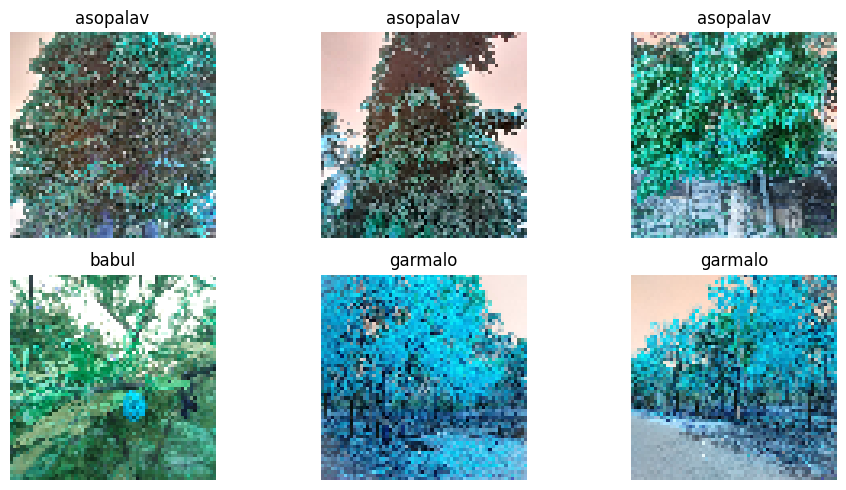

Training the model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.0994 - loss: 3.8324 - val_accuracy: 0.1391 - val_loss: 2.9768
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.1824 - loss: 2.7568 - val_accuracy: 0.2087 - val_loss: 2.7904
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3407 - loss: 2.3359 - val_accuracy: 0.2348 - val_loss: 2.6308
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4679 - loss: 1.8755 - val_accuracy: 0.2783 - val_loss: 2.5097
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6910 - loss: 1.4218 - val_accuracy: 0.3696 - val_loss: 2.2696
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3650 - loss: 2.2883

Test Accuracy: 36.96%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


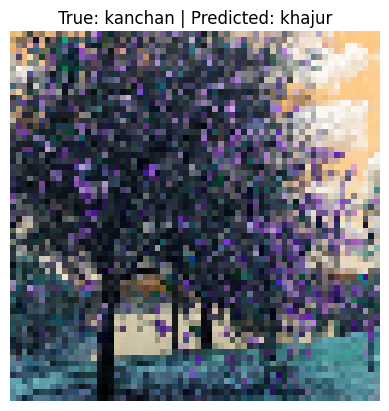

In [5]:
# Import basic libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Mount Google Drive (just in case not done)
from google.colab import drive
drive.mount('/content/drive')

# Set path to dataset
dataset_path = "/content/drive/MyDrive/Dataset/Tree_Species_Dataset"

# Define image size (smaller = faster training)
IMG_SIZE = 64

# Prepare lists to store data
images = []
labels = []

# Loop through folders (each folder is a tree species)
print("Loading images from each folder...")
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            try:
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image
                images.append(img)
                labels.append(class_folder)
            except:
                pass  # Ignore any error files

print(f"Total images loaded: {len(images)}")

# Convert to numpy array
X = np.array(images)
y = np.array(labels)

# Normalize pixel values
X = X / 255.0

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Show few sample images with labels
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X[i])
    plt.title(le.inverse_transform([np.argmax(y_categorical[i])])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("Training the model...")
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Predict on a test image
idx = np.random.randint(0, len(X_test))
img = X_test[idx]
true_label = le.inverse_transform([np.argmax(y_test[idx])])[0]
pred_label = le.inverse_transform([np.argmax(model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 3)))])[0]

plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {pred_label}")
plt.axis('off')
plt.show()
